In [1]:
from autumn.tools.project import get_project
from autumn.settings import Region
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
from autumn.tools.calibration.targets import get_target_series
import pandas as pd
from autumn.tools.utils.pretty import pretty_print

In [2]:
project = get_project("covid_19", "myanmar")

In [3]:
params_baseline = project.param_set.baseline
# pretty_print(params_baseline)

In [4]:
model = project.run_baseline_model(params_baseline)

In [5]:
derived_df = model.get_derived_outputs_df()

In [6]:
def plot_derived_outputs(requested_outputs):

    # Preparing
    pyplot.style.use("ggplot")
    fig = pyplot.figure(figsize=(14, 8))
    for i_out, output in enumerate(requested_outputs):

        # Plotting
        axis = fig.add_subplot(2, 2, i_out + 1)
        axis.plot(derived_df[output])

        try:
            target_dates, target_values = get_target_series(project.calibration.targets, REF_DATE, output)
            axis.scatter(target_dates, target_values, c="k")
        except:
            print(f"targets not available for {output}")

        # Finishing up
        axis.set_title(output)
        axis.set_ylim(bottom=0.)
        if "prop_" in output:
            axis.set_ylim(top=1.)
        pyplot.setp(axis.get_xticklabels(), rotation=45)
    fig.tight_layout()

# Main indicators

targets not available for infection_deaths
targets not available for hospital_admissions
targets not available for icu_admissions


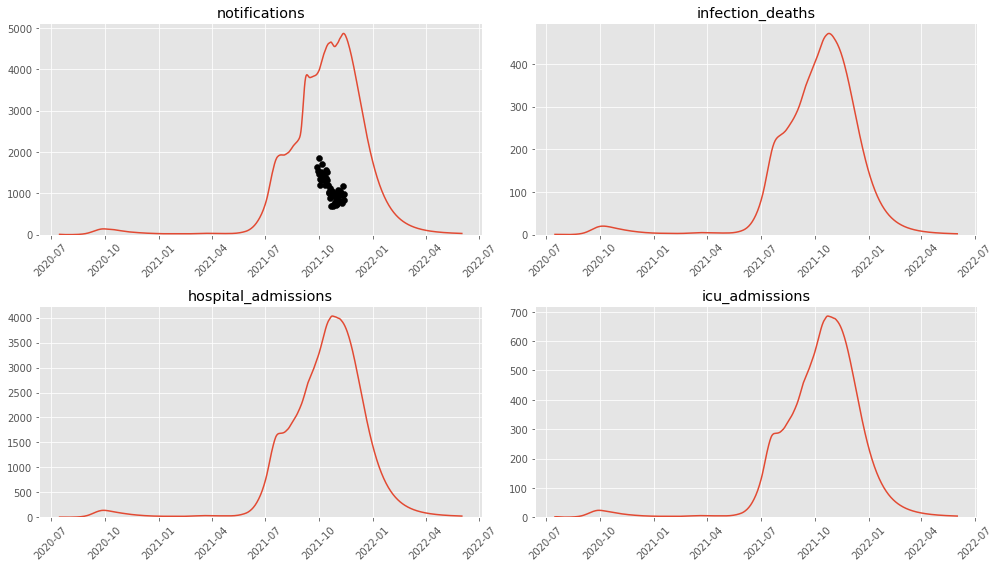

In [7]:
plot_derived_outputs(("notifications", "infection_deaths", "hospital_admissions", "icu_admissions"))

# Vaccination coverage
Note this is all ages, whereas implementation is based on 15+ years only

In [8]:
derived_df["proportion_one_dose"]

2020-07-16    0.000000
2020-07-17    0.000236
2020-07-18    0.000472
2020-07-19    0.000708
2020-07-20    0.000944
2020-07-21    0.001180
2020-07-22    0.001416
2020-07-23    0.001652
2020-07-24    0.001888
2020-07-25    0.002123
2020-07-26    0.002359
2020-07-27    0.002594
2020-07-28    0.002830
2020-07-29    0.003065
2020-07-30    0.003300
2020-07-31    0.003536
2020-08-01    0.003771
2020-08-02    0.004006
2020-08-03    0.004241
2020-08-04    0.004476
2020-08-05    0.004710
2020-08-06    0.004945
2020-08-07    0.005180
2020-08-08    0.005414
2020-08-09    0.005649
2020-08-10    0.005883
2020-08-11    0.006118
2020-08-12    0.006352
2020-08-13    0.006586
2020-08-14    0.006820
                ...   
2022-05-03    0.381400
2022-05-04    0.381973
2022-05-05    0.382546
2022-05-06    0.383118
2022-05-07    0.383689
2022-05-08    0.384259
2022-05-09    0.384829
2022-05-10    0.385397
2022-05-11    0.385972
2022-05-12    0.386577
2022-05-13    0.387179
2022-05-14    0.387781
2022-05-15 

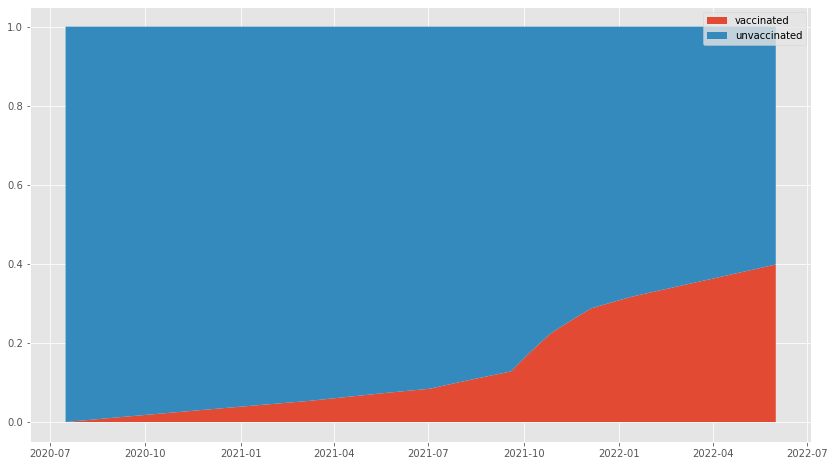

In [9]:
fig = pyplot.figure(figsize=(14, 8))
axis = fig.add_subplot(1, 1, 1)

axis.fill_between(
    derived_df.index,
    [0.] * len(derived_df),
    derived_df["proportion_one_dose"],
    label="vaccinated"
)
# axis.fill_between(
#     derived_df.index,
#     derived_df["proportion_fully_vaccinated"],
#     derived_df["at_least_one_dose_prop"],
#     label="one dose only"
# )
axis.fill_between(
    derived_df.index,
    derived_df["proportion_one_dose"],
    [1.] * len(derived_df), 
    label="unvaccinated"
)
axis.legend()

targets not available for proportion_seropositive


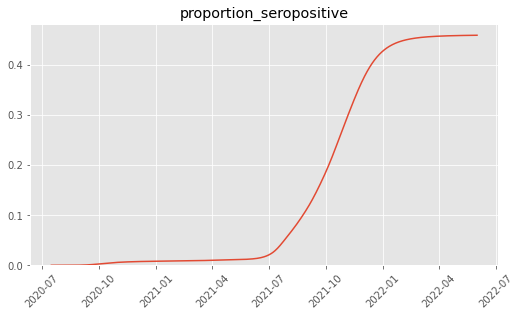

In [10]:
plot_derived_outputs(("proportion_seropositive",))

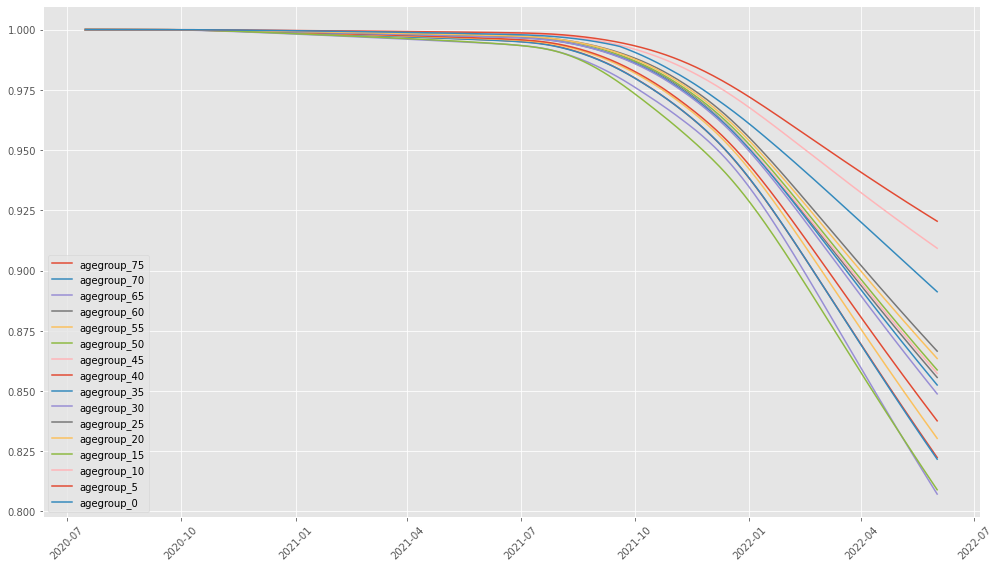

In [11]:
# Preparing
fig = pyplot.figure(figsize=(14, 8))
axis = fig.add_subplot(1, 1, 1)
requested_outputs = [col for col in derived_df.columns if "proportion_seropositiveX" in col]
for i_out, output in enumerate(requested_outputs):

    # Plotting
    axis.plot(derived_df[output], label=output.split("X")[1])

    # Finishing up
    pyplot.setp(axis.get_xticklabels(), rotation=45)

axis.legend()
fig.tight_layout()